Задача:
Исследователь проводил эксперимент с доставкой заказов в двух разных районах (A и B). Он хочет определить, есть ли статистически значимая разница во времени доставки между этими двумя 
группами. В DataFrame, который ты предоставила, у нас есть информация о времени доставки (delivery_time) и группе эксперимента (experiment_group) для каждого заказа.

Твоя задача:

1 - Провести предварительный анализ данных, включающий описание статистик (describe()) для времени доставки в каждой группе эксперимента (experiment_group).

2 - Сформулировать нулевую и альтернативную гипотезы для этой задачи.

3 - Применить t-тест (например, scipy.stats.ttest_ind()) для сравнения времени доставки между группами.

4 - Проанализировать результаты t-теста и сделать выводы о статистической значимости разницы во времени доставки между группами.

5 - Включить в отчет значения p-значения и интерпретировать его значение с учетом выбранного уровня значимости.

Обрати внимание, что в данной задаче мы предполагаем, что распределения времени доставки в каждой группе примерно нормальны и имеют одинаковую дисперсию. Также, чтобы выполнить тест, 
необходимо убедиться, что выборки достаточно большие для применения центральной предельной теоремы.

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [20]:
df = pd.read_csv('experiment_lesson_4.csv')

In [21]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


1 - Провести предварительный анализ данных, включающий описание статистик (describe()) для времени доставки в каждой группе эксперимента (experiment_group).

In [22]:
# Проверяю типы

df.dtypes

order_id              int64
delivery_time       float64
district             object
experiment_group     object
dtype: object

In [23]:
# Проверяю наличие дубликатов в df

df.duplicated().sum()

0

In [24]:
# Смотрю кол-во пропущенных значений в столбцах

df.isnull().sum()

order_id            0
delivery_time       0
district            0
experiment_group    0
dtype: int64

In [25]:
# Использую метод describe

df.describe()

,order_id,delivery_time
count,20196.000000,20196.000000
mean,11103.503565,42.054169
std,5835.424404,10.382196
min,1000.000000,10.000000
25%,6048.750000,35.000000
50%,11109.500000,42.000000
75%,16158.250000,49.000000
max,21207.000000,83.000000


In [26]:
df['experiment_group'].describe()

count     20196
unique        2
top        test
freq      10104
Name: experiment_group, dtype: object

In [27]:
# Делю данные на группы тест и контрол

control_group = df[df['experiment_group'] == 'control']
test_group = df[df['experiment_group'] == 'test']

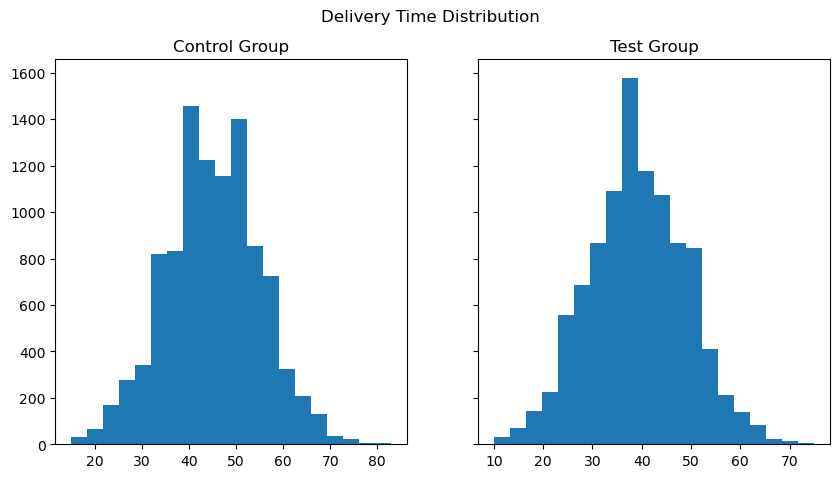

In [28]:
# строю графики

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
axs[0].hist(control_group['delivery_time'], bins=20)
axs[0].set_title('Control Group')
axs[1].hist(test_group['delivery_time'], bins=20)
axs[1].set_title('Test Group')
fig.suptitle('Delivery Time Distribution')
plt.show()

Теперь 2 датафрейма отфильтрованы на тестовую и контрольную группу

Поскольку новые датафреймы выдают ошибку  из-за типа данных object (AttributeError: 'Series' object has no attribute 'discribe')
в документации Pandas нашла, как работать с describe и с датафреймами, которые нам нужны. А именно датафреймф тест и контрол, 
разбиты на контрольную и тестовую группы.

In [29]:
test_group.describe(include=[object])  # включение в describe только строковых столбцов

,district,experiment_group
count,10104,10104
unique,3,1
top,Purlieus,test
freq,8179,10104


In [30]:
test_group.describe(exclude=[object])  # Исключение столбцов объекта из DataFrame описания           

,order_id,delivery_time
count,10104.000000,10104.000000
mean,16155.500000,39.046813
std,2916.917894,9.883308
min,11104.000000,10.000000
25%,13629.750000,32.000000
50%,16155.500000,39.000000
75%,18681.250000,46.000000
max,21207.000000,75.000000


In [31]:
control_group.describe(include=[object])

,district,experiment_group
count,10092,10092
unique,3,1
top,Purlieus,control
freq,8781,10092


In [32]:
control_group.describe(exclude=[object])

,order_id,delivery_time
count,10092.000000,10092.000000
mean,6045.500000,45.065101
std,2913.453792,9.990017
min,1000.000000,15.000000
25%,3522.750000,38.000000
50%,6045.500000,45.000000
75%,8568.250000,52.000000
max,11091.000000,83.000000


2 - Сформулировать нулевую и альтернативную гипотезы для этой задачи.

Нулевая гипотеза (H0): Нет статистически значимой разницы во времени доставки между контрольной и тестовой группами.

Альтернативная гипотеза (H1): Существует статистически значимая разница во времени доставки между контрольной и тестовой группами.

Для проведения t-теста использую функцию stats.ttest_ind() из библиотеки SciPy.

In [33]:
# Формулирую гипотезы

null_hypothesis = 'Нет статистически значимой разницы во времени доставки между контрольной и тестовой группами.'
alternative_hypothesis = 'Существует статистически значимая разница во времени доставки между контрольной и тестовой группами.'

In [34]:
# Выполняю t-тест

t_statistic, p_value = stats.ttest_ind(control_group['delivery_time'], test_group['delivery_time'])

In [35]:
# Результаты t-теста

print('t-статистика:', t_statistic)
print('p-значение:', p_value)

t-статистика: 43.03582663183714
p-значение: 0.0


In [36]:
# Сравнение p-значения с уровнем значимости alpha

alpha = 0.05
if p_value < alpha:
    print('Отклоняем нулевую гипотезу.')
    print(alternative_hypothesis)
else:
    print('Не можем отклонить нулевую гипотезу.')
    print(null_hypothesis)

Отклоняем нулевую гипотезу.
Существует статистически значимая разница во времени доставки между контрольной и тестовой группами.


3 - Применить t-тест (например, scipy.stats.ttest_ind()) для сравнения времени доставки между группами.

In [37]:
stats.ttest_ind(test_group['delivery_time'], control_group['delivery_time'], equal_var = False)

Ttest_indResult(statistic=-43.035552024241454, pvalue=0.0)

4 - Проанализировать результаты t-теста и сделать выводы о статистической значимости разницы во времени доставки между группами.

Анализ t-статистики:

Значение t-статистики больше 0, это означает, что среднее значение времени доставки в тестовой группе выше, чем в контрольной группе. 


 Анализ p-значения:

p-value меньше уровня значимости (0.05), это говорит о том, что разница между группами статистически значима.

Мы отклоняем нулевую гипотезу, это означает, что существует статистически значимая разница во времени доставки между группами. И можно сделать вывод о том, что группы имеют различия во времени доставки и данные дают основание считать это наблюдение неслучайным.

5 - Включить в отчет значения p-значения и интерпретировать его значение с учетом выбранного уровня значимости.

Полученное p-значение равно 0.0, что говорит о крайне низкой вероятности случайности и подчеркивает статистическую значимость различия во времени доставки между группами, особенно с учетом выбранного уровня значимости (0.05).